In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('dataset.csv')


In [9]:
df

,name,chain,type,seat,location,menu items,rate,telephone
0,shila,True,Restaurant,50,1,59,4.7,88862491
1,land,True,Pizza,40,1,45,4.3,88215242
2,naam,False,Café,30,0,20,4.0,88922948
3,noon,True,Café,15,1,15,5.0,38449276
4,shabdiz,True,Restaurant,100,1,42,4.9,38666666
5,neyshekar,True,Pastry,0,1,8,4.0,3724 1053
6,naan reza,False,Bakery,0,0,3,4.0,32259269
7,chorak amin,False,Bakery,0,0,10,4.5,3876 2200
8,iran burger,NaN,Fast Food,20,1,40,4.7,3603 1616


In [10]:
df.drop(['name'] , axis=1, inplace=True)
df['chain']
df

,chain,type,seat,location,menu items,rate,telephone
0,True,Restaurant,50,1,59,4.7,88862491
1,True,Pizza,40,1,45,4.3,88215242
2,False,Café,30,0,20,4.0,88922948
3,True,Café,15,1,15,5.0,38449276
4,True,Restaurant,100,1,42,4.9,38666666
5,True,Pastry,0,1,8,4.0,3724 1053
6,False,Bakery,0,0,3,4.0,32259269
7,False,Bakery,0,0,10,4.5,3876 2200
8,NaN,Fast Food,20,1,40,4.7,3603 1616


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chain       8 non-null      object 
 1   type        9 non-null      object 
 2   seat        9 non-null      int64  
 3   location    9 non-null      int64  
 4   menu items  9 non-null      int64  
 5   rate        9 non-null      float64
 6   telephone   9 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 636.0+ bytes


In [12]:
df[df['chain'].isnull()]

,chain,type,seat,location,menu items,rate,telephone
8,NaN,Fast Food,20,1,40,4.7,3603 1616


In [13]:
df['chain'].unique()

array([True, False, nan], dtype=object)

In [14]:
df['chain'].value_counts()

chain
True     5
False    3
Name: count, dtype: int64

In [15]:
df['chain'].fillna(False, inplace=True)


C:\Users\Ala\AppData\Local\Temp\ipykernel_8824\3271104005.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chain'].fillna(False, inplace=True)
C:\Users\Ala\AppData\Local\Temp\ipykernel_8824\3271104005.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['chain'].fillna(False, inplace=True)


In [16]:
df['chain'].isnull().sum()

np.int64(0)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
tedad_type = df['type'].value_counts()
tedad_type

type
Restaurant    2
Café          2
Bakery        2
Pizza         1
Pastry        1
Fast Food     1
Name: count, dtype: int64

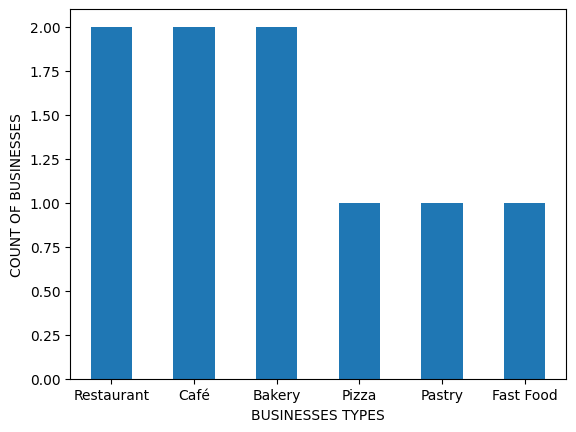

In [20]:
tedad_type.plot(kind='bar', rot=0)

plt.xlabel('BUSINESSES TYPES')
plt.ylabel('COUNT OF BUSINESSES')

plt.show()

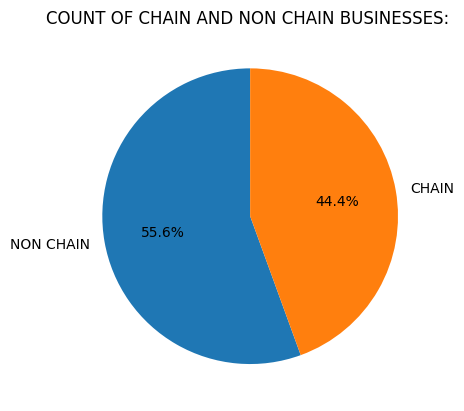

In [27]:
protation_chain = df['chain'].value_counts()

fig, ax = plt.subplots(facecolor='white')
ax.pie(protation_chain, labels=['NON CHAIN', 'CHAIN'], autopct='%1.1f%%', startangle=90)
ax.set_title('COUNT OF CHAIN AND NON CHAIN BUSINESSES: ')

plt.show()

In [28]:
zanjire = df.groupby(['type', 'chain'])['chain'].count().sort_values()
zanjire

type        chain
Café        False    1
            True     1
Fast Food   False    1
Pastry      True     1
Pizza       True     1
Bakery      False    2
Restaurant  True     2
Name: chain, dtype: int64

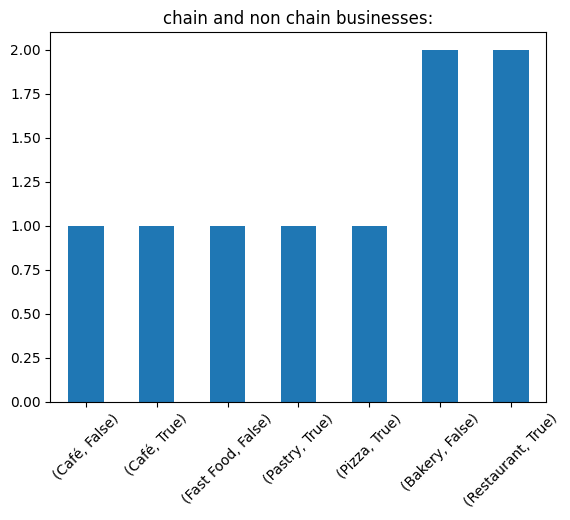

In [29]:
zanjire.plot(kind='bar', rot=45)

plt.xlabel("")
plt.title("chain and non chain businesses:")

plt.show()

In [30]:
is_chain = df[df['chain'] == True]
is_chain

,chain,type,seat,location,menu items,rate,telephone
0,True,Restaurant,50,1,59,4.7,88862491
1,True,Pizza,40,1,45,4.3,88215242
3,True,Café,15,1,15,5.0,38449276
4,True,Restaurant,100,1,42,4.9,38666666
5,True,Pastry,0,1,8,4.0,3724 1053


In [31]:
print(is_chain['seat'].describe())

count      5.000000
mean      41.000000
std       38.470768
min        0.000000
25%       15.000000
50%       40.000000
75%       50.000000
max      100.000000
Name: seat, dtype: float64


In [33]:
rate=df[df['rate']> 3.5]
rate['type'].value_counts()

type
Restaurant    2
Café          2
Bakery        2
Pizza         1
Pastry        1
Fast Food     1
Name: count, dtype: int64

In [34]:
def f(x):
    if x < 14:
        return 'few'
    else:
        return 'many'

In [35]:
rate['menu'] = rate['menu items'].apply(f)
rate

,chain,type,seat,location,menu items,rate,telephone,menu
0,True,Restaurant,50,1,59,4.7,88862491,many
1,True,Pizza,40,1,45,4.3,88215242,many
2,False,Café,30,0,20,4.0,88922948,many
3,True,Café,15,1,15,5.0,38449276,many
4,True,Restaurant,100,1,42,4.9,38666666,many
5,True,Pastry,0,1,8,4.0,3724 1053,few
6,False,Bakery,0,0,3,4.0,32259269,few
7,False,Bakery,0,0,10,4.5,3876 2200,few
8,False,Fast Food,20,1,40,4.7,3603 1616,many


In [36]:
menu_daste = rate['menu'].value_counts()
menu_daste

menu
many    6
few     3
Name: count, dtype: int64

Text(0.5, 1.0, 'COUNT OF MENU ITEMS OF BUSINESSES THEY HAVE RATE > 3.5')

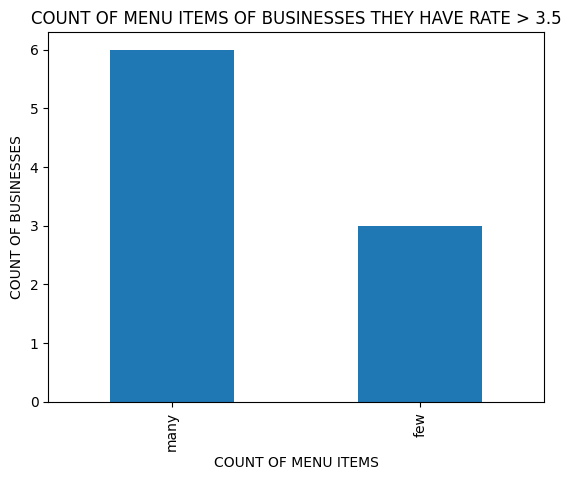

In [37]:
menu_daste.plot(kind='bar')

plt.xlabel("COUNT OF MENU ITEMS")
plt.ylabel("COUNT OF BUSINESSES")
plt.title("COUNT OF MENU ITEMS OF BUSINESSES THEY HAVE RATE > 3.5")